In [57]:
import pandas as pd  # For data manipulation.
import numpy as np  # For numerical computing.
import plotly.express as px  # For drawing interactive statistical graphics.
import plotly.graph_objects as go  # For creating figures and setting figure properties.
import matplotlib.pyplot as plt  # For creating static and interactivevisualizations.
import itertools  # For providing various iterator building blocks for efficient looping.
from itertools import cycle  # To cycle over a sequence indefinitely.
from sklearn.model_selection import train_test_split  # For Splitting data into train and test subsets.
from sklearn.feature_extraction.text import TfidfVectorizer  # For converting a collection of raw documents to a matrix of TF-IDF features.
from sklearn.ensemble import RandomForestClassifier  # A ML algorith that fits a number of decision tree classifiers on various sub-samples of the dataset.
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, roc_auc_score   # For generating model evaluation metrics.
from sklearn.preprocessing import label_binarize  # To binarize labels in a one-vs-all fashion for multiclass classification.
print('Setup Complete')

Setup Complete


In [58]:
#Defining the path and loading the data:
path = r"...\Twitter_Data.csv"
df = pd.read_csv(path)

# EDA and Cleaning

In [47]:
#Exploring the data:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [48]:
#Printing the columns' names:
col_names= df.columns
print(col_names)

Index(['clean_text', 'category'], dtype='object')


In [49]:
# check for the % of the missing values:
missing_data_percent = df[col_names].isnull().mean() * 100
print(missing_data_percent)

clean_text    0.002454
category      0.004295
dtype: float64


In [50]:
#Dropping the nulls:
dfc = df.dropna()

In [51]:
# Plotting the sentiments against count of instances:

# Map the numeric category values to text labels
category_map = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
dfc['category_label'] = dfc['category'].map(category_map)

# Count the number of instances per category and reset the index to make it a column
category_counts = dfc['category_label'].value_counts().reset_index()
category_counts.columns = ['Sentiment', 'Counts']

# Convert counts to thousands for display
category_counts['Counts'] = category_counts['Counts'] / 1000

# Create an interactive bar chart
fig = px.bar(category_counts, 
             x='Sentiment', 
             y='Counts', 
             labels={'Sentiment': 'Sentiment', 'Counts': 'Number of Statements (in thousands)'},
             title='Number of Instances per Category')


fig.update_layout(title_x=0.5)

# Add annotations 
for idx, row in category_counts.iterrows():
    fig.add_annotation(
        x=row['Sentiment'], 
        y=row['Counts'],
        text=f"{row['Counts']:.2f}K",  # Format as thousands
        showarrow=False,
        yshift=10)


fig.show()


C:\Users\Besitzer\AppData\Local\Temp\ipykernel_7028\1821352082.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
import plotly.express as px

# Map the numeric category values to text labels
category_map = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
dfc['category_label'] = dfc['category'].map(category_map)

# Count the number of instances per category
category_counts = dfc['category_label'].value_counts()

# Create an interactive donut chart
fig = px.pie(category_counts, 
             names=category_counts.index, 
             values=category_counts.values, 
             hole=0.7, 
             title='Percentage of Sentiments')

# Customization to show the percentage on the chart
fig.update_traces(textinfo='percent+label', textposition='inside')

# Add a thin white line between segments
fig.update_traces(marker=dict(line=dict(color='#FFFFFF', width=2)))

# The title to be in the center
fig.update_layout(title_x=0.5)

# Show the plot
fig.show()


C:\Users\Besitzer\AppData\Local\Temp\ipykernel_7028\3168434798.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Bulding the Random Forest Classifier

In [53]:
# Step 1: Verctorizing the tweets (X) and defining (y) 
vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1, 2))
X = vectorizer.fit_transform(dfc['clean_text'])
y = dfc['category']

# Step 2: Splitting the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Building and Training the Random Forest Model
rf_classifier = RandomForestClassifier(n_estimators=50, class_weight='balanced', max_depth = 35, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_classifier.predict(X_test)

# Evaluating the Model
print("Tes Set Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report for test set:\n", classification_report(y_test, y_pred))

Tes Set Accuracy: 0.7523470577406884

Classification Report for test set:
               precision    recall  f1-score   support

        -1.0       0.64      0.62      0.63      7152
         0.0       0.69      0.89      0.78     11067
         1.0       0.90      0.71      0.79     14375

    accuracy                           0.75     32594
   macro avg       0.74      0.74      0.73     32594
weighted avg       0.77      0.75      0.75     32594



In [54]:
# Predicting the training set results:
y_train_pred = rf_classifier.predict(X_train)

# Evaluating the Model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_classification_report = classification_report(y_train, y_train_pred)

print("Training Set Accuracy:", train_accuracy)
print("\nTraining Set Classification Report:\n", train_classification_report)


Training Set Accuracy: 0.8074400767018217

Training Set Classification Report:
               precision    recall  f1-score   support

        -1.0       0.77      0.74      0.75     28357
         0.0       0.70      0.92      0.80     44144
         1.0       0.97      0.75      0.85     57874

    accuracy                           0.81    130375
   macro avg       0.81      0.81      0.80    130375
weighted avg       0.83      0.81      0.81    130375



### From the above reports, it is clear that the model performs slightly better on the training set compared to its performance on the test set. Such a discrepancy is expected, especially considering that the difference is almost 5%. Moreover, the model is effective at classifying the 'Positive' label, followed by 'Neutral', and is least effective at classifying the 'Negative' label.


# Confusion Matrix 

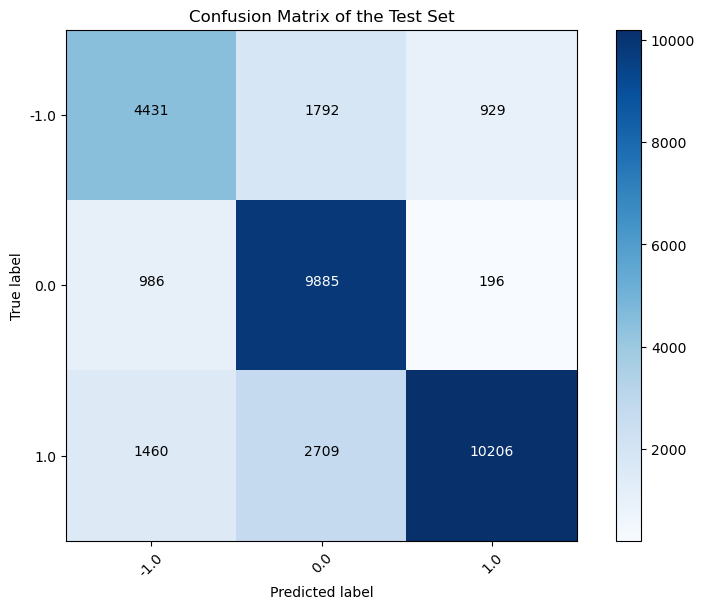

In [55]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix of the Test Set')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


### Generally speaking, the confusion matrix gives many insights about the output of the model. Forexample, a detailed performance breakdown, true positives and true negatives, Type I and Type II errors, class-b-class analysis, precision and recall, identifying missclassifications, direction of errors, model improvement, and showing the current state of the balance between the different classes. In this example, the model was mostly sucssful in classifying the 'positive' sentiment, follwed by the 'neutral', and less efficient in identifying the 'negative' sentiment. As the numbers, on the top-left to bottom-right diagonal, show. 

# ROC 

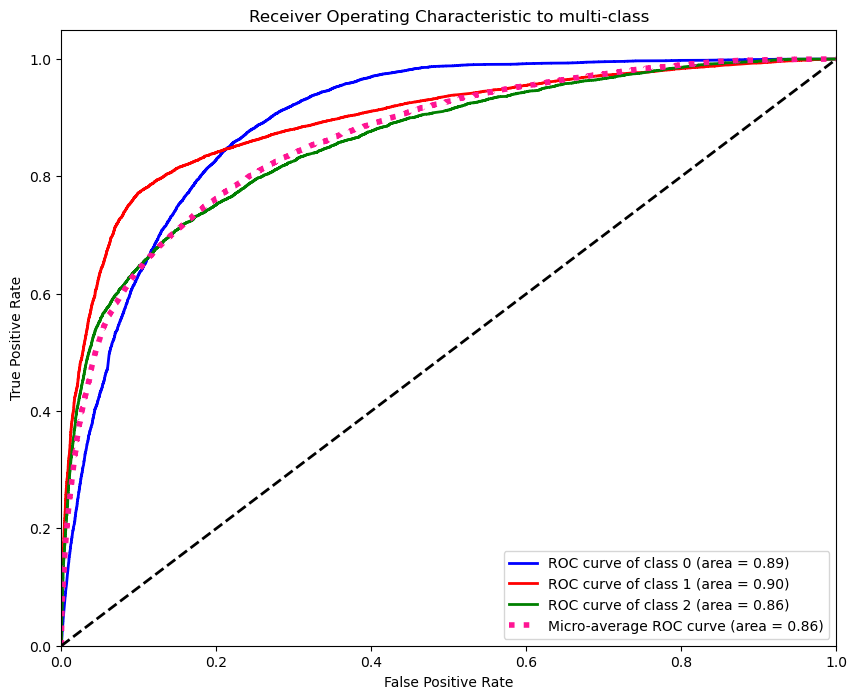

In [56]:
# Preprocessing text data
vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1, 2))
X = vectorizer.fit_transform(dfc['clean_text'])

# Convert categories to 0, 1, 2 for label binarization
y = dfc['category'].apply(lambda x: x if x != -1 else 2)

# Binarize the output for multiclass ROC curve
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50, class_weight='balanced', max_depth=35, random_state=42)
rf_classifier.fit(X_train, y_train)

# Get predicted probabilities for each class
y_score = rf_classifier.predict_proba(X_test)

# Convert list of arrays to a 2D array for ROC calculation
y_score = np.array([probs[:, 1] for probs in y_score]).T

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label=f'Micro-average ROC curve (area = {roc_auc["micro"]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


#### The ROC curve is used for illustrating graphically the diagnostic ability of a binary calssifier as its dsicrimination threshhold varied. It plots the True Positive Rates (TPR) against the False Positive Rate (FPR) at different treshhold settings. The approach used here to handle this multi class task is One-vs-Rest. The three classes are 1, 0, -1, which had been mapped to 1, 0, 2 respctively.  The fact that the curves are closer to the top-left corner shows a lower FPR for a given TPR.

#### The other value that appears beside the legends is called AUC. A value of 1.0 represents a perfect model, and a value of 0.5 represents a model that is not better than random guessing. In this case, all the values are closer to 1.0, which indicates that the model is able to seperate and distinguish between different classes. 